# **Homework 6 - K-Means Clustering**
# KDD Tuesdays 12:30 - 2:45 
## Jake Brulato

### **Import the packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import sklearn.metrics

### **Read the data**

In [2]:
dataset = pd.read_csv("AdultUCI.csv", sep=',')
dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,small
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,small
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,small
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,small
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,NaN
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,NaN
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,NaN
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,NaN


### **Check for the columns with nulls**

In [3]:
num = dataset.isnull().any().sum()
print("Columns with nulls: " , num)
dataset.isnull().any()

Columns with nulls:  4


age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
income             True
dtype: bool

### **Drop the Nulls**

In [4]:
clean_data = dataset.dropna()
clean_data.info()
print(clean_data.isnull().sum())
clean_data

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
age               0
workclass         0
fnlwgt            0
education         0
education-num     

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,small
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,small
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,small
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,small
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,small
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,large
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,small
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,small


### **Remove Categorical Columns**

In [16]:
removed_data = clean_data.drop(columns= ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'sex', 'race', 'native-country'], axis= 1)
removed_data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
0,39,77516,13,2174,0,40,small
1,50,83311,13,0,0,13,small
2,38,215646,9,0,0,40,small
3,53,234721,7,0,0,40,small
4,28,338409,13,0,0,40,small
...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,small
32557,40,154374,9,0,0,40,large
32558,58,151910,9,0,0,40,small
32559,22,201490,9,0,0,20,small


### **Normalize the remaining columns**

In [17]:
removed_data.columns = ['age','fnlwgt','education_num','capital_gain', 'capital_loss', 'hours_per_week', 'income']
removed_data['income'] = removed_data['income'].map({'small': 0, 'big': 1})
x = removed_data.drop('income',axis=1)
y = removed_data['income']
# normalize each variable to have mean=0 and sd=1
clusterdata=x.copy()
for i in range(clusterdata.shape[1]):
    clusterdata.iloc[:,i] = preprocessing.scale(clusterdata.iloc[:,i])

clusterdata.head()
y.head()

/var/folders/6s/bfbnxg_x46gfcltpcwwr67200000gn/T/ipykernel_56721/3442205443.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.04279571  0.88028814 -0.03333996 ...  1.48937355 -1.25151078
  1.0325595 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  clusterdata.iloc[:,i] = preprocessing.scale(clusterdata.iloc[:,i])
/var/folders/6s/bfbnxg_x46gfcltpcwwr67200000gn/T/ipykernel_56721/3442205443.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.0627216  -1.00787131  0.24469349 ... -0.3585745   0.11070545
  0.92884082]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  clusterdata.iloc[:,i] = preprocessing.scale(clusterdata.iloc[:,i])
/var/folders/6s/bfbnxg_x46gfcltpcwwr67200000gn/T/ipykernel_56721/3442205443.py:8: FutureWarning: Setting an item of incompatible

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: income, dtype: float64

### **Perform k-means cluster analysis based on the Euclidean distance.**

In [18]:
# k-means cluster analysis for 1-10 clusters
from scipy.spatial.distance import cdist
clusters=range(1,11)
meandist=[]

#Perform k-means analysis, as well as check the average within cluster distances vs. different k values
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clusterdata)
    clusassign=model.predict(clusterdata)
    meandist.append(sum(np.min(cdist(clusterdata, model.cluster_centers_, 'euclidean'), axis=1))
    / clusterdata.shape[0])


### **Check the average within cluster distances for different k values (from k =1 to k = 10).**

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

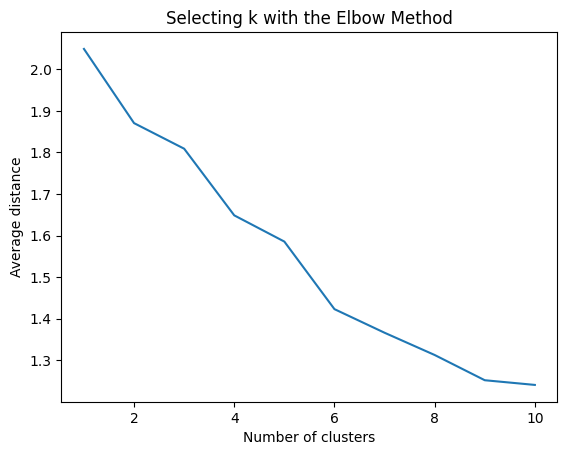

In [19]:
%matplotlib inline
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')

### **K takes the value of 2 in order to match the two ground truth groups (small income and big income)**

In [20]:
model = KMeans(n_clusters=2)
model.fit(clusterdata)
model.labels_
predY = np.choose(model.labels_, [0, 1]).astype(np.int64)

In [10]:
x.head()
# y.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


AttributeError: 'Series' object has no attribute 'income'

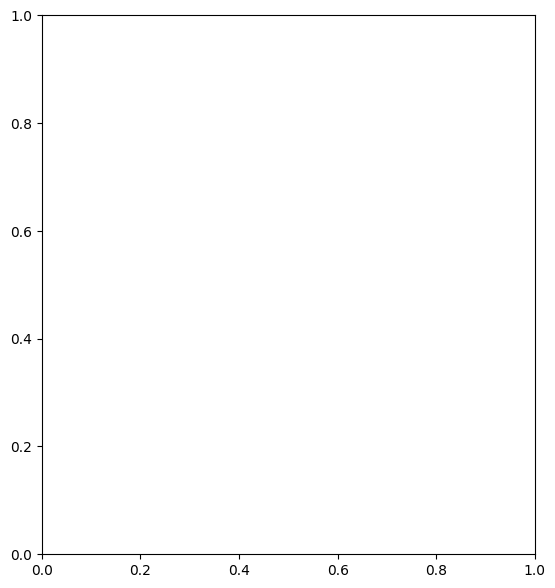

In [27]:
# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))

# Create a colormap
colormap = np.array(['red', 'black', 'lime'])

# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(x.age, x.fnlwgt, c=colormap[y.income], s=40)
plt.title('Ground Truth Class')

# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(x.age, x.fnlwgt, c=colormap[model.labels_], s=40)
plt.title('K Means Clustering Result')